### Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import numpy as np
import requests
import json
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
tweet_arch = pd.read_csv('twitter-archive-enhanced.csv')
# create copy
tweet_arch_clean = tweet_arch.copy() 

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [ ]:
#use request to get image_predictions data
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(r.content)
    

In [3]:
#load into notebook and create copy
img_predict = pd.read_csv('image-predictions.tsv', sep='\t')
img_predict_clean = img_predict.copy()

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret  = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = tweet_arch.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file

# Had to name this  tweet_json_fake.txt  since it will affect the original which has already been downloaded

with open('tweet_json_fake.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


In [4]:
# load json data

data = [json.loads(line) for line in open('tweet_json.txt', 'r')]

json_data = pd.DataFrame(data)

## Assessing Data



In [5]:
tweet_arch_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1266,709852847387627521,NaN,NaN,2016-03-15 21:24:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*lets out a tiny whimper and then collapses* ....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709852847...,12,10,None,None,None,None,None
2165,669367896104181761,NaN,NaN,2015-11-25 04:11:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chip. Chip's pretending to be choked. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669367896...,10,10,Chip,None,None,None,None
483,814986499976527872,NaN,NaN,2016-12-31 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. Someone attacked him with a sh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/814986499...,11,10,Cooper,None,None,pupper,None
607,798209839306514432,NaN,NaN,2016-11-14 17:03:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cooper. His bow tie was too heavy for ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/798209839...,13,10,Cooper,None,None,None,None
94,874012996292530176,NaN,NaN,2017-06-11 21:18:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He can't see all the colors...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/874012996...,13,10,Sebastian,None,None,None,puppo


In [6]:
tweet_arch_clean[tweet_arch_clean['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [7]:
tweet_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
tweet_arch_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
img_predict_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1504,785170936622350336,https://pbs.twimg.com/media/CuV8yfxXEAAUlye.jpg,2,seat_belt,0.891193,False,Eskimo_dog,0.027494,True,Samoyed,0.019530,True
1362,761292947749015552,https://pbs.twimg.com/media/CpCn5aXXgAAOPTm.jpg,1,standard_poodle,0.660893,True,Samoyed,0.314886,True,miniature_poodle,0.008834,True
1342,758854675097526272,https://pbs.twimg.com/media/Cof-SuqVYAAs4kZ.jpg,4,barrow,0.974047,False,Old_English_sheepdog,0.023791,True,komondor,0.001246,True
1415,771102124360998913,https://pbs.twimg.com/media/CrOBSfgXgAABsTE.jpg,1,Labrador_retriever,0.568789,True,pug,0.179918,True,Staffordshire_bullterrier,0.034437,True
368,672968025906282496,https://pbs.twimg.com/media/CVbc2V2WsAE3-kn.jpg,1,toy_poodle,0.678046,True,miniature_poodle,0.160273,True,Airedale,0.065649,True


In [10]:
img_predict_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
img_predict_clean.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [12]:
sum(img_predict_clean.duplicated())

0

In [13]:
json_data.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
1114,Tue May 17 14:57:41 +0000 2016,732585889486888962,732585889486888962,"When your teacher agreed on 10,000 RTs and no ...",False,"[0, 96]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 732585876857835521, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,4016,False,False,False,False,en,NaN,NaN,NaN,NaN
1312,Mon Mar 07 17:58:08 +0000 2016,706901761596989440,706901761596989440,This is Elliot. He's blocking the roadway. Dow...,False,"[0, 134]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 706901753699155968, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2264,False,False,False,False,en,NaN,NaN,NaN,NaN
1764,Sun Dec 20 02:20:55 +0000 2015,678399652199309312,678399652199309312,This made my day. 12/10 please enjoy https://t...,False,"[0, 60]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 678399528077250560, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,61794,False,False,False,False,en,NaN,NaN,NaN,NaN
684,Mon Oct 17 22:51:57 +0000 2016,788150585577050112,788150585577050112,This is Leo. He's a golden chow. Rather h*ckin...,False,"[0, 80]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 788150566354583552, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,6865,False,False,False,False,en,NaN,NaN,NaN,NaN
1191,Wed Apr 06 02:21:30 +0000 2016,717537687239008257,717537687239008257,People please. This is a Deadly Mediterranean ...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 717537679412486144, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,6281,False,False,False,False,en,NaN,NaN,NaN,NaN


In [14]:
json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [15]:
json_data[json_data['retweeted_status'].notnull()]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
31,Sat Jul 15 02:45:48 +0000 2017,886054160059072513,886054160059072513,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,False,"[0, 50]","{'hashtags': [{'text': 'BATP', 'indices': [21,...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,False,False,und,{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...,8.860534e+17,886053434075471873,NaN
35,Thu Jul 13 01:35:06 +0000 2017,885311592912609280,885311592912609280,RT @dog_rates: This is Lilly. She just paralle...,False,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 830583314243268608, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,False,False,en,{'created_at': 'Sun Feb 12 01:04:29 +0000 2017...,NaN,NaN,NaN
67,Mon Jun 26 00:13:58 +0000 2017,879130579576475649,879130579576475649,RT @dog_rates: This is Emmy. She was adopted t...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Fri Jun 23 01:10:23 +0000 2017...,NaN,NaN,NaN
72,Sat Jun 24 00:09:53 +0000 2017,878404777348136964,878404777348136964,RT @dog_rates: Meet Shadow. In an attempt to r...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Fri Jun 23 16:00:04 +0000 2017...,NaN,NaN,NaN
73,Fri Jun 23 18:17:33 +0000 2017,878316110768087041,878316110768087041,RT @dog_rates: Meet Terrance. He's being yelle...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Tue Nov 24 03:51:38 +0000 2015...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,Sat Jun 25 01:52:36 +0000 2016,746521445350707200,746521445350707200,RT @dog_rates: This is Shaggy. He knows exactl...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Sat Nov 21 00:46:50 +0000 2015...,NaN,NaN,NaN
1041,Fri Jun 17 16:01:16 +0000 2016,743835915802583040,743835915802583040,RT @dog_rates: Extremely intelligent dog here....,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Thu Nov 19 00:32:12 +0000 2015...,NaN,NaN,NaN
1240,Mon Mar 21 19:31:59 +0000 2016,711998809858043904,711998809858043904,RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,False,"[0, 97]","{'hashtags': [{'text': 'LoveTwitter', 'indices...","{'media': [{'id': 711998175234510848, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,False,False,en,{'created_at': 'Mon Mar 21 19:29:52 +0000 2016...,NaN,NaN,NaN
2257,Fri Nov 20 03:51:52 +0000 2015,667550904950915073,667550904950915073,RT @dogratingrating: Exceptional talent. Origi...,False,"[0, 123]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 667548685090197504, 'id_str'...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,...,0,False,False,False,False,en,{'created_at': 'Fri Nov 20 03:43:06 +0000 2015...,NaN,NaN,NaN


### Quality issues

1. missing values

2. timestamp column should contain date format only

3. retweets and replies.

4. None should be NaN

5. wrong ratings

6. dtypes of various columns such as timestamp ,rating_denominator , rating_numerator

7. dog breed names , some starting with lowercase others uppercase.

8. predictions should be in a single column




### Tidiness issues

1. columns names in json_data to match that of tweet_arch_clean.

2. dog stage columns in tweet_arch_clean should be in a single column 


## Cleaning Data

**Please Note** : 

> ***copies of datasets have been made in the Data Gathering Section***

> ***issues may not be solved in the order as written above and two or more relating issues may be solved at the same time / cell***

### Issue : timestamp dtype should be datetime

#### Define:  clean time_stamp column and set to correct dtype

#### Code

In [16]:
# clean time_stamp column and set to correct dtype
tweet_arch_clean['timestamp'] = tweet_arch_clean['timestamp'].str[:10]
tweet_arch_clean['timestamp'] = pd.to_datetime(tweet_arch_clean['timestamp'])




#### Test

In [17]:
tweet_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2356 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2356 non-null   datetime64[ns]
 4   source                      2356 non-null   object        
 5   text                        2356 non-null   object        
 6   retweeted_status_id         181 non-null    float64       
 7   retweeted_status_user_id    181 non-null    float64       
 8   retweeted_status_timestamp  181 non-null    object        
 9   expanded_urls               2297 non-null   object        
 10  rating_numerator            2356 non-null   int64         
 11  rating_denominator          2356 non-null   int64       

### Issue : retweets and replies.

#### Define: remove data with retweets and replies in tweet_arch_clean and json_data

#### Code

In [18]:
# get indexes of retweets 
retweet_index = tweet_arch_clean[tweet_arch_clean['retweeted_status_id'].notna()].index
retweet_index_json = json_data[json_data['retweeted_status'].notna()].index
# drop
tweet_arch_clean = tweet_arch_clean.drop(np.r_[retweet_index])
json_data = json_data.drop(np.r_[retweet_index_json])


#### Test

In [19]:
tweet_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2175 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2175 non-null   datetime64[ns]
 4   source                      2175 non-null   object        
 5   text                        2175 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2117 non-null   object        
 10  rating_numerator            2175 non-null   int64         
 11  rating_denominator          2175 non-null   int64       

In [20]:
json_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2175 non-null   object 
 1   id                             2175 non-null   int64  
 2   id_str                         2175 non-null   object 
 3   full_text                      2175 non-null   object 
 4   truncated                      2175 non-null   bool   
 5   display_text_range             2175 non-null   object 
 6   entities                       2175 non-null   object 
 7   extended_entities              1994 non-null   object 
 8   source                         2175 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

### Issue :  dog stage columns in tweet_arch_clean should be in a single column 

#### Define :   combine all stages to a single column, and change all *None*  to *NaN*

#### Code

In [21]:
# rows with more than one dog stages
tweet_arch_clean.loc[(tweet_arch_clean[['doggo', 'floofer', 'pupper','puppo']]!='None' ).sum(axis=1) > 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
191,855851453814013952,NaN,NaN,2017-04-22,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,doggo,None,None,puppo
200,854010172552949760,NaN,NaN,2017-04-17,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
460,817777686764523521,NaN,NaN,2017-01-07,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Burke (pupper) and Dexter (doggo)...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460...,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25,"<a href=""http://twitter.com/download/iphone"" r...","Like doggo, like pupper version 2. Both 11/10 ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048...,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22,"<a href=""http://twitter.com/download/iphone"" r...",This is Bones. He's being haunted by another d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11,"<a href=""http://twitter.com/download/iphone"" r...",This is Pinot. He's a sophisticated doggo. You...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...","Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
956,751583847268179968,NaN,NaN,2016-07-09,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo,None,pupper,None


In [22]:
# merge all stages to a single column dog_stage
tweet_arch_clean['dog_stage'] = tweet_arch_clean[['puppo', 'pupper','floofer','doggo']].apply(lambda x: ','.join(x.astype(str)), axis=1) 
tweet_arch_clean['dog_stage'] = tweet_arch_clean['dog_stage'].str.replace(r'(,None)',repl='')
tweet_arch_clean.drop(['puppo', 'pupper','floofer','doggo'], axis=1, inplace=True)
tweet_arch_clean['dog_stage'] = tweet_arch_clean['dog_stage'].str.replace('None,', '')

# change all None to NaN
tweet_arch_clean['dog_stage'] = tweet_arch_clean['dog_stage'].str.replace('None', pd.isnull)  


<ipython-input-22-74b7816c9ebe>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet_arch_clean['dog_stage'] = tweet_arch_clean['dog_stage'].str.replace(r'(,None)',repl='')


In [23]:
# remove un-necessary columns from tweet_arch_clean

tweet_arch_clean = tweet_arch_clean[['tweet_id','timestamp','expanded_urls', 'text' ,
                                    'rating_numerator', 'rating_denominator' , 'dog_stage']]

#### Test

In [24]:
tweet_arch_clean['dog_stage'].unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'puppo,doggo',
       'floofer,doggo', 'pupper,doggo'], dtype=object)

In [25]:
tweet_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   int64         
 1   timestamp           2175 non-null   datetime64[ns]
 2   expanded_urls       2117 non-null   object        
 3   text                2175 non-null   object        
 4   rating_numerator    2175 non-null   int64         
 5   rating_denominator  2175 non-null   int64         
 6   dog_stage           344 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 135.9+ KB


### Issue : columns names in json_data to match that of tweet_arch_clean.

#### Define :  clean json_data and merge with tweet_arch_clean   

#### Code

In [26]:
# get needed columns 
json_data = json_data[['id', 'retweet_count', 'favorite_count']]

# rename columns
json_data = json_data.rename(columns={'id': 'tweet_id'})

# merge with tweet_arch_clean
tweet_arch_clean = tweet_arch_clean.merge(json_data, on='tweet_id')

#### Test

In [27]:
tweet_arch_clean.sample(5)

,tweet_id,timestamp,expanded_urls,text,rating_numerator,rating_denominator,dog_stage,retweet_count,favorite_count
834,747512671126323200,2016-06-27,https://twitter.com/dog_rates/status/747512671...,Guys pls stop sending actual sharks. It's too ...,10,10,NaN,1803,6110
121,865718153858494464,2017-05-19,https://twitter.com/dog_rates/status/865718153...,Meet Boomer. He's just checking pup on you. Ho...,13,10,NaN,6008,26640
1224,699413908797464576,2016-02-16,https://twitter.com/dog_rates/status/699413908...,Meet Miley. She's a Scandinavian Hollabackgirl...,11,10,NaN,688,2258
1185,702899151802126337,2016-02-25,https://vine.co/v/i6iIrBwnTFI,Say hello to Luna. Her tongue is malfunctionin...,12,10,NaN,509,1772
1397,687460506001633280,2016-01-14,https://twitter.com/dog_rates/status/687460506...,This is Kramer. He's a Picasso Tortellini. Tie...,10,10,NaN,614,2243


### Issue : incorrect ratings (numerator and denominator)

#### Define :  collect correct rating values manually since they are other values with '/'  that aren't ratings and replace in tweet_arch_clean.

#### Code

In [28]:
tweet_arch_clean.query('rating_numerator > 14').head(5)

,tweet_id,timestamp,expanded_urls,text,rating_numerator,rating_denominator,dog_stage,retweet_count,favorite_count
52,881633300179243008,2017-07-02,NaN,@roushfenway These are good dogs but 17/10 is ...,17,10,NaN,7,129
162,855862651834028034,2017-04-22,NaN,@dhmontgomery We also gave snoop dogg a 420/10...,420,10,NaN,27,320
163,855860136149123072,2017-04-22,NaN,@s8n You tried very hard to portray this good ...,666,10,NaN,1058,4407
246,838150277551247360,2017-03-04,NaN,@markhoppus 182/10,182,10,NaN,370,1824
247,838085839343206401,2017-03-04,NaN,@bragg6of8 @Andy_Pace_ we are still looking fo...,15,10,NaN,0,150


In [29]:
# get indexes of those with ratings > 14  
indexes = tweet_arch_clean.query('rating_numerator > 14').index
indexes

Int64Index([  52,  162,  163,  246,  247,  263,  363,  429,  558,  617,  733,
             804,  942, 1024, 1050, 1075, 1095, 1172, 1254, 1455, 1456, 1484,
            1533, 1600, 1664, 1895],
           dtype='int64')

In [30]:
# collect correct rating values manually since they are other values with '/' 
# that aren't ratings

c_rating_numerator = [
    13,420,666,182,15,13,84 , np.nan,9.75,11.27,165,1776,204,11,99,80,45,60,44,143,121,20,11.26,144,88,420
    ]
c_rating_denominator = [
    10 ,10 ,10,10,10,10 ,70 ,np.nan, 10 ,10 ,150,10 ,170 ,10 ,90 ,80 ,50 ,50 ,40 ,130,110 ,16,10 ,120 ,80 ,10 
]

# compare lengths
len(indexes) == len(c_rating_numerator) # returns true
len(indexes) == len(c_rating_denominator) # returns true

True

In [31]:
# replace existing values with correct ones , this should change the dtype to float

for i in range(len(indexes)):
    for j in range(len(c_rating_numerator)):
        if i == j:
            tweet_arch_clean.rating_numerator[indexes[i]] =  c_rating_numerator[j]
            tweet_arch_clean.rating_denominator[indexes[i]] =  c_rating_denominator[j]



<ipython-input-31-5e57b82b055a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_arch_clean.rating_numerator[indexes[i]] =  c_rating_numerator[j]
<ipython-input-31-5e57b82b055a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_arch_clean.rating_denominator[indexes[i]] =  c_rating_denominator[j]
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setite

### Test


In [32]:
tweet_arch_clean.sample(4)

,tweet_id,timestamp,expanded_urls,text,rating_numerator,rating_denominator,dog_stage,retweet_count,favorite_count
484,799297110730567681,2016-11-17,https://twitter.com/dog_rates/status/799297110...,This is Jeffrey. He's quite the jokester. Take...,11.0,10.0,NaN,3227,11065
689,765395769549590528,2016-08-16,https://twitter.com/dog_rates/status/765395769...,This is my dog. Her name is Zoey. She knows I'...,13.0,10.0,NaN,3127,20539
1855,671743150407421952,2015-12-01,https://twitter.com/dog_rates/status/671743150...,This is a Tuscaloosa Alcatraz named Jacob (Yac...,11.0,10.0,NaN,248,779
1427,685667379192414208,2016-01-09,https://twitter.com/dog_rates/status/685667379...,This is Marty. He has no idea what happened he...,9.0,10.0,pupper,666,2579


### Issue :  Predictions should be in a single column and dog breed names should be in lowercase

#### Define : get all true image predictions , merge as one and also merge to the tweet_arch_column

#### Code

In [33]:
# get 1st true predictions
p1_true = img_predict_clean.query('p1_dog == True')[['tweet_id', 'p1' , 'jpg_url']]

# get 2nd true predictions where the first is false

p1_false = img_predict_clean.query('p1_dog == False')
p2_true = p1_false.query('p2_dog == True')[['tweet_id', 'p2', 'jpg_url']]

# get 3rd prediction where the 1st and 2nd are false
p3_true = img_predict_clean.query('p1_dog == False and p2_dog == False and p3_dog == True')[['tweet_id', 'p3', 'jpg_url']]

# rename columns 

p1_true.rename(columns={'p1': 'dog_breed'}, inplace=True)
p2_true.rename(columns={'p2': 'dog_breed'}, inplace=True)
p3_true.rename(columns={'p3': 'dog_breed'}, inplace=True)

# append and merge
dog_bread = p1_true.append([p2_true, p3_true])
tweet_arch_clean = tweet_arch_clean.merge(dog_bread, on='tweet_id')

# reformat columns
tweet_arch_clean = tweet_arch_clean[['tweet_id', 'timestamp', 'dog_breed','dog_stage','rating_numerator','rating_denominator',  'retweet_count','favorite_count','jpg_url']]

# master dataset
master_data = tweet_arch_clean

# dog breed names to lower case
master_data.dog_breed = master_data.dog_breed.str.lower()

### Test

In [34]:
master_data.head()

,tweet_id,timestamp,dog_breed,dog_stage,rating_numerator,rating_denominator,retweet_count,favorite_count,jpg_url
0,892177421306343426,2017-08-01,chihuahua,NaN,13.0,10.0,6514,33819,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
1,891815181378084864,2017-07-31,chihuahua,NaN,12.0,10.0,4328,25461,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg
2,891689557279858688,2017-07-30,labrador_retriever,NaN,13.0,10.0,8964,42908,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg
3,891327558926688256,2017-07-29,basset,NaN,12.0,10.0,9774,41048,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg
4,891087950875897856,2017-07-29,chesapeake_bay_retriever,NaN,13.0,10.0,3261,20562,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg


## Storing Data


In [35]:
# store
#csv 
master_data.to_csv('twitter_archive_master.csv', index=False)


#sqlite
engine = create_engine('sqlite:///twitter_archive_master.db')
master_data.to_sql('twitter_archive_master', engine)

## Analyzing and Visualizing Data


## Questions

> What dog_breed has the highest retweet_count and favourite count?

> What's the most rated and lowest rating dog breeds?

###### Using the master_data  dataset

In [49]:

%matplotlib inline
master_data['avg_rating'] = master_data['rating_numerator'] / master_data['rating_denominator']
df =  master_data.groupby('dog_breed').sum()[['rating_numerator', 'rating_denominator', 'retweet_count', 'favorite_count','avg_rating']]


### Question 1:  What dog_breed has the highest retweet_count and favourite count?

In [37]:
df['retweet_count'].sort_values()

dog_breed
japanese_spaniel         471.0
groenendael              553.0
entlebucher              706.0
irish_wolfhound          819.0
brabancon_griffon        863.0
                        ...   
samoyed               203446.0
chihuahua             251807.0
pembroke              292052.0
labrador_retriever    407573.0
golden_retriever      587528.0
Name: retweet_count, Length: 113, dtype: float64

In [64]:
master_data['retweet_count'].sum()

4749661

In [38]:
df['favorite_count'].sort_values()

dog_breed
japanese_spaniel         1362.0
irish_wolfhound          1534.0
standard_schnauzer       2046.0
groenendael              2313.0
brabancon_griffon        2655.0
                        ...    
samoyed                583906.0
chihuahua              746604.0
pembroke              1039484.0
labrador_retriever    1274526.0
golden_retriever      1946934.0
Name: favorite_count, Length: 113, dtype: float64

### Question 2:  What's the most rated dog breed?

In [51]:
df['avg_rating'].sort_values()

dog_breed
japanese_spaniel        0.500000
scotch_terrier          0.900000
irish_wolfhound         1.100000
entlebucher             1.100000
clumber                 1.127000
                         ...    
pug                    63.500000
chihuahua              95.636364
pembroke              108.400000
labrador_retriever    120.900000
golden_retriever      180.918182
Name: avg_rating, Length: 113, dtype: float64

### Insights

* From the analysis , the golden_retriever dog breed is the most favored , most retweeted and has the highest rating of all the dog breeds.




### Visualization

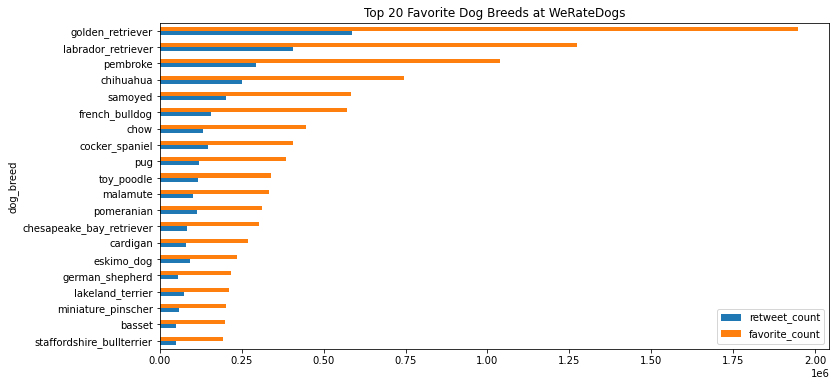

In [41]:
d = df[['retweet_count','favorite_count']]

d.sort_values(by='favorite_count').tail(20).plot(kind='barh', figsize=(12,6), title='Top 20 Favorite Dog Breeds at WeRateDogs');



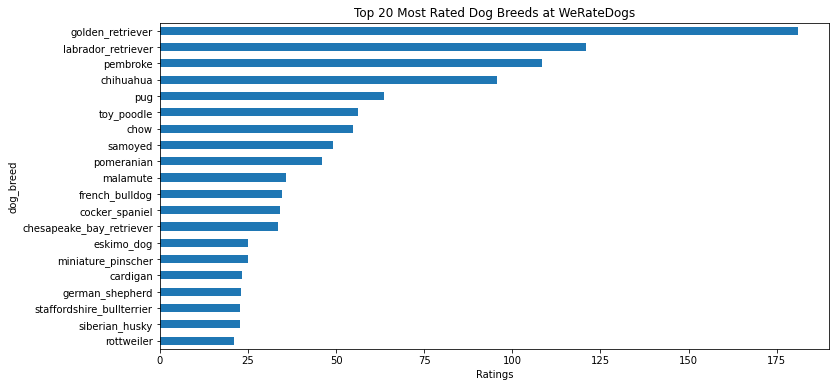

In [59]:
df['avg_rating'].sort_values().tail(20).plot(kind='barh',figsize=(12,6), title='Top 20 Most Rated Dog Breeds at WeRateDogs');
plt.xlabel('Ratings');

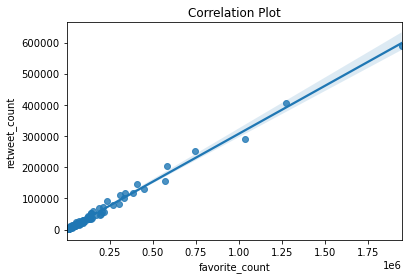

In [43]:
import seaborn as sb
sb.regplot(x = df['favorite_count'],y =  df['retweet_count']);
plt.xlabel('favorite_count')
plt.ylabel('retweet_count')
plt.title('Correlation Plot')
plt.show()

References:
https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/   